# Import Libraries

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer

# Checking Dataset

In [43]:
#Calling csv file
df = pd.read_csv('diabetes.csv')

#Having a first pick at the dataset
df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [44]:
#Check for Null values and Data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [45]:
#Look for duplicates
df.duplicated().sum()

0

In [46]:
#Quick Statistic summary 
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


There dataframe shows as there are no missing values present in the dataset.

For the sake of creating better visualisations and easing further analysis, I will be creating a secondary dataframe which will put some of the main health-related variables at a certain range (bins):

Glucose
- Below normal: < 70 mg/dL,
Normal: 70 - 99 mg/dL,
Above normal: 100 - 125 mg/dL,
Excessively high: >= 126 mg/dL

BloodPressure
- Below normal: < 90/60 mmHg,
Normal: 90/60 - 119/79 mmHg,
Above normal: 120/80 - 139/89 mmHg,
Excessively high: >= 140/90 mmHg

SkinThickness
- Below normal: < 10 mm,
Normal: 10 - 30 mm,
Above normal: 31 - 40 mm,
Excessively high: >= 41 mm

Insulin
- Below normal: < 16 mcU/mL,
Normal: 16 - 166 mcU/mL,
Above normal: 167 - 249 mcU/mL,
Excessively high: >= 250 mcU/mL

BMI
- Underweight: < 18.5 kg/m^2,
Normal: 18.5 - 24.9 kg/m^2,
Overweight: 25 - 29.9 kg/m^2,
Obese: >= 30 kg/m^2


### Creating a second dataset

In [47]:
# define the bins
glu_bins = [0, 70, 99, 125, 199]
blo_bins = [0, 90, 119, 139, 140]
skn_bins = [0, 10, 30, 40, 99]
Ins_bins = [0, 16, 166, 249, 846]
bmi_bins = [0, 18.5, 24.9, 29.9, 34.9, 67.1]

# define labels
glu_labels = ['<70', '70-99', '100-125', '>=126']
blo_labels = ['<90', '90-119', '120-139', '>=140']
skn_labels = ['<10', '10-30', '31-40', '>=41']
Ins_labels = ['<16', '16-166', '167-249', '>=250']
bmi_labels = ['<18.5', '18.5-24.9', '25-29.9', '30-34.9', '>=35']

#create df copy
df2 = df.copy()

# use cut to bin val and replace column
df2['Glucose'] = pd.cut(df2['Glucose'], bins=glu_bins, labels=glu_labels)
df2['BloodPressure'] = pd.cut(df2['BloodPressure'], bins=blo_bins, labels=blo_labels)
df2['SkinThickness'] = pd.cut(df2['SkinThickness'], bins=skn_bins, labels=skn_labels)
df2['Insulin'] = pd.cut(df2['Insulin'], bins=Ins_bins, labels=Ins_labels)
df2['BMI'] = pd.cut(df2['BMI'], bins=bmi_bins, labels=bmi_labels)


In [48]:
df2.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,>=126,<90,31-40,NaN,30-34.9,0.627,50,1
1,1,70-99,<90,10-30,NaN,25-29.9,0.351,31,0
2,8,>=126,<90,NaN,NaN,18.5-24.9,0.672,32,1


After creating bins we can now highlight some of the missing values

In [49]:
#Checking the null values
df2.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

It is impossible for a Living Human Being to have 0 levels of glucose, blood pressure, skin thickness, Insuline or BMI.

Therefore I will have to deal with the missing values and replace them. 

This time I will be using the KNN imputation

In [50]:
# Convert non-numerical variables to numerical using LabelEncoder
col_imp = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
label_encoders = {}
for col in col_imp:
    if df2[col].dtype == 'object':
        le = LabelEncoder()
        df2[col] = le.fit_transform(df2[col].astype(str))
        label_encoders[col] = le

# Impute missing values using SimpleImputer with mode strategy
imputer = SimpleImputer(strategy='most_frequent')
df2_imp = pd.DataFrame(imputer.fit_transform(df2), columns=df2.columns)

# Convert back numerical values to categorical using inverse_transform
for col in col_imp:
    if df2_imp[col].dtype == 'int':
        le = label_encoders[col]
        df2_imp[col] = le.inverse_transform(df2_imp[col])

# Convert categorical columns back to object type
df2_imp[col_imp] = df2_imp[col_imp].astype(object)

In [54]:
#Check that result is comform
df2 = df2_imp
df2.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,>=126,<90,31-40,16-166,30-34.9,0.627,50,1
1,1,70-99,<90,10-30,16-166,25-29.9,0.351,31,0
2,8,>=126,<90,10-30,16-166,18.5-24.9,0.672,32,1


# Data Visualisation & EDA

c:\Users\kimka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Distribution of Pregnancies')

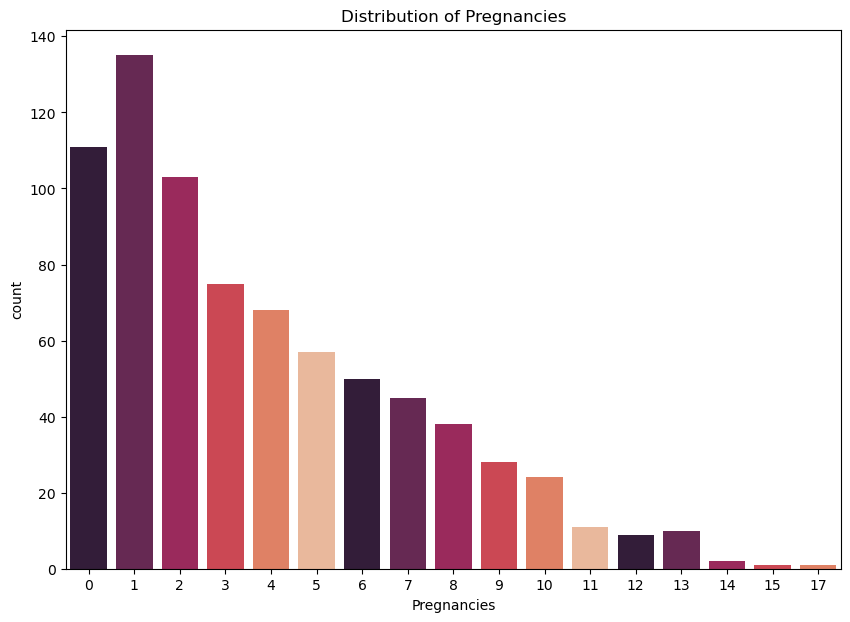

In [70]:
#Bar chart of pregnancy quantity
color = sns.color_palette("rocket")
plt.figure(figsize=(10, 7))
sns.countplot(df2['Pregnancies'], palette=color)
plt.title('Distribution of Pregnancies')
#plt.show()

In [ ]:
# Pie chart of Glucose, Blood Pressure, Skin Thickness, Insuline

In [ ]:
#Create a Pie chart and Bar chart of BMI 

In [ ]:
#Plot Graph on Outcome & BMI

In [ ]:
#Plot Graph on Outcome & Pregnancy

In [ ]:
#Plot Graph on Insuline & Outcome

In [ ]:
#Plot Graph on Outcome & Glucose

In [ ]:
#Chart on Outcome 